<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter6/GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 6.16
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
#from matplotlib import cm
from numpy.linalg import norm, inv
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(1234)

## Generate events

In [4]:
def generate_event(n, s):
   x = np.random.rand(n, 1)
   y = np.random.normal(loc=0, scale=s, size=(n, 1))
   y = y + 2*np.sin(2*pi*x)
   return x, y

## Gaussian Kernel

In [5]:
def k(x,u,sig2):
    return(np.exp(-0.5*(x- u)**2/sig2))

[ 0.28286915  0.7728294  -0.48711817 -0.03517244  0.15398443 -0.10424938
  0.51690037 -1.20022682  1.01530181 -0.57131564]


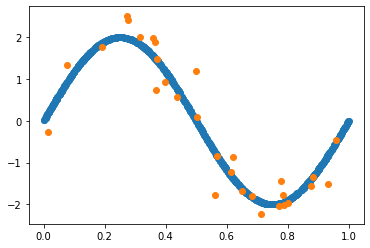

In [6]:
N = 100
n = 30
s = 0.5
sig2 = 0.2*0.2
x, y = generate_event(n, s)
print(np.random.normal(loc=0, scale=s, size=(10)))
xx, yy = generate_event(1000, 0)
plt.plot(xx,yy,"o")
plt.plot(x,y,"o")
plt.show()

## Reproduce Figure 6.7 (left)

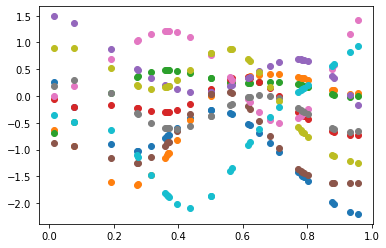

In [7]:
def k(x,u,sig2):
    return(np.exp(-0.5*(x-u)**2/sig2))

K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = k(x[i],x[j],sig2)

nf = 10
ys = np.random.multivariate_normal(mean=np.zeros(x.shape).T[0], cov=K, size=nf)

for i in range(nf):
   plt.plot(x, ys[i], 'o')
plt.show()


## Reproduce Figure 6.8 (left)

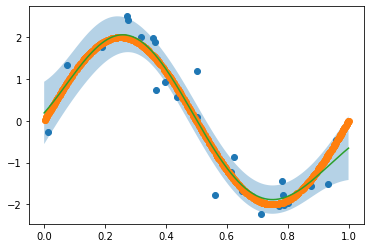

In [8]:
def kvector(xt,xo,sig2):
    vk = np.zeros(xo.shape[0])
    for j in range(xo.shape[0]):
        vk[j] = k(xt,xo[j],sig2)
    return vk

N = 1000
sig2 = 0.2**2

K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = k(x[i],x[j],sig2)
        
KI = inv(K + np.identity(n)*s*s)

xt = np.linspace(0.0, 1.0, N)
mu = np.zeros(N)
msig2 = np.zeros(N)
for i in range(N):
    vk = kvector(xt[i],x,sig2)
    mu[i] = vk @ KI @ y
    msig2[i] = k(xt[i], xt[i], sig2) - vk.T @ KI @ vk

msig = np.sqrt(msig2)
mu_u = mu + msig * 1.96
mu_p = mu - msig * 1.96

plt.plot(x,y,"o")
plt.plot(xx,yy,"o")
plt.plot(xt, mu, '-')
plt.fill_between(xt,mu_u,mu_p,alpha=.33)
plt.show()

## Reproduce Figure 6.8 (right)

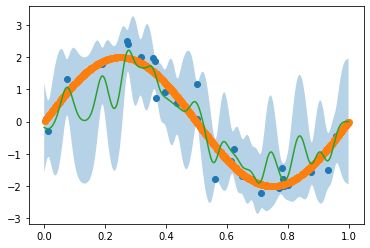

In [9]:
sig2 = 0.02**2
K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = k(x[i],x[j],sig2)
        
KI = inv(K + np.identity(n)*s*s)

xt = np.linspace(0.0, 1.0, N)
mu = np.zeros(N)
msig2 = np.zeros(N)
for i in range(N):
    vk = kvector(xt[i],x,sig2)
    mu[i] = vk @ KI @ y
    msig2[i] = k(xt[i], xt[i], sig2) - vk.T @ KI @ vk

msig = np.sqrt(msig2)
mu_u = mu + msig * 1.96
mu_p = mu - msig * 1.96

plt.plot(x,y,"o")
plt.plot(xx,yy,"o")
plt.plot(xt, mu, '-')
plt.fill_between(xt,mu_u,mu_p,alpha=.33)
plt.show()